In [1]:
# importing necessary libraries
import numpy as np
import tensorflow as tf
import pickle as pkl
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as k
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense, Dropout, Activation, Flatten,Input
import cv2
import os

In [2]:
# specigyiing the directory where data is present
DIRECTORY = r'D:/flip_robo/training/'


In [3]:
# specifying the categories
CATEGORIES = ['jeans','saree','trousers']

(320, 188, 3)

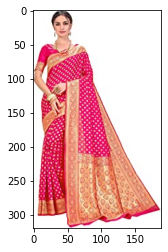

In [4]:
# loading single image to check whether data is properly imported or not
img=image.load_img('D:/flip_robo/training/saree/img2.jpg')
plt.imshow(img)
cv2.imread('D:/flip_robo/training/saree/img2.jpg').shape

###### saree images has a dimension of 320 length , 188 width and it is a RGB image

(320, 141, 3)

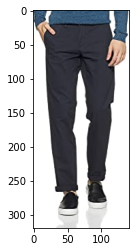

In [5]:
# loading single image to check whether data is properly imported or not
img=image.load_img('D:/flip_robo/training/trousers/img0.jpg')
plt.imshow(img)
cv2.imread('D:/flip_robo/training/trousers/img0.jpg').shape

###### trouser images has a dimension of 320 length , 141 width and it is a RGB image

(320, 162, 3)

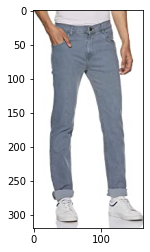

In [6]:
# loading single image to check whether data is properly imported or not
img=image.load_img('D:/flip_robo/training/jeans/img0.jpg')
plt.imshow(img)
cv2.imread('D:/flip_robo/training/jeans/img0.jpg').shape

###### jeans images has a dimension of 320 length , 141 width and it is a RGB image

### creating data in required format

##### reading every image converting it into arrray and saving it in list along with label

In [7]:
# reading every image converting it into arrray and save it in list
data = []                                            # empty list to save image array and label 
for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)         # it will join the directory and category
    
    for img in os.listdir(folder):                      # for all the images in the folder
        img_path = os.path.join(folder, img)          # it will take all the directory of folder and  images like training/jeans/img1
        arr = cv2.imread(img_path)        #here cv2 converts the image into array
        new_arr = cv2.resize(arr, (140,320))    # it resizes all the images into given dimension 
        label=CATEGORIES.index(category)         # it takes the category name as one hot encoded
        data.append([new_arr, label])           # it appends the array and label

In [8]:
data

[[array([[[241, 243, 244],
          [ 87,  94, 106],
          [ 44,  59,  83],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[246, 248, 249],
          [144, 150, 161],
          [ 49,  63,  86],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[251, 254, 255],
          [218, 225, 230],
          [ 83,  95, 116],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         ...,
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [252, 251, 251],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255

In [9]:
data[0][1]

0

#### as the image data converted is done line by line so shuffling the data

In [10]:
import random
random.shuffle(data)

In [11]:
# defining empty list to save the data in required form of x and y 
x = []
y = []

## separating the data in train and test format

In [12]:
for features, label in data:
    x.append(features)
    y.append(label)

In [13]:
x= np.array(x)
y = np.array(y)

In [14]:
x

array([[[[250, 254, 255],
         [253, 254, 255],
         [255, 255, 253],
         ...,
         [ 82, 103, 155],
         [ 70,  89, 127],
         [171, 188, 216]],

        [[250, 254, 255],
         [253, 254, 255],
         [255, 255, 253],
         ...,
         [ 76,  98, 147],
         [ 98, 115, 152],
         [217, 232, 243]],

        [[250, 255, 255],
         [253, 255, 255],
         [255, 255, 253],
         ...,
         [ 75,  94, 139],
         [142, 156, 188],
         [231, 243, 252]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

In [15]:
y

array([0, 0, 0, 2, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 1, 2, 2,
       1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2,
       1, 1, 2, 1, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2,
       1, 1, 0, 1, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0,
       0, 1, 1, 2, 0, 0, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2,
       0, 1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 2, 0, 2, 1, 1, 0, 0, 2, 2, 2, 0, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0,
       0, 2, 0, 2, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 0, 2, 2,
       0, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0,
       0, 2, 2, 2, 1, 0, 1, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 2, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 0,
       2, 1, 2, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 1, 1, 2, 2, 0, 1,
       2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 1, 1, 2,
       1, 0, 2, 0, 2, 1, 2, 0, 0, 2, 1, 2, 0, 0, 2,

In [16]:
import pickle

In [17]:
# dumping the data
pickle.dump(x, open('X.pkl', 'wb'))
pickle.dump(y, open('y.pkl', 'wb'))

In [18]:
# for normalizing the data dividing the each element of data by 255
x = x/255

In [19]:
# this is now the x looks like a range between 0 to 1
x

array([[[[0.98039216, 0.99607843, 1.        ],
         [0.99215686, 0.99607843, 1.        ],
         [1.        , 1.        , 0.99215686],
         ...,
         [0.32156863, 0.40392157, 0.60784314],
         [0.2745098 , 0.34901961, 0.49803922],
         [0.67058824, 0.7372549 , 0.84705882]],

        [[0.98039216, 0.99607843, 1.        ],
         [0.99215686, 0.99607843, 1.        ],
         [1.        , 1.        , 0.99215686],
         ...,
         [0.29803922, 0.38431373, 0.57647059],
         [0.38431373, 0.45098039, 0.59607843],
         [0.85098039, 0.90980392, 0.95294118]],

        [[0.98039216, 1.        , 1.        ],
         [0.99215686, 1.        , 1.        ],
         [1.        , 1.        , 0.99215686],
         ...,
         [0.29411765, 0.36862745, 0.54509804],
         [0.55686275, 0.61176471, 0.7372549 ],
         [0.90588235, 0.95294118, 0.98823529]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [20]:
# checking the dimension of x
x.shape

(986, 320, 140, 3)

###### 986 is total number of image 320 is the height of the image 140 is the breadth , 3 is the channel number for RGB

In [21]:
y.shape

(986,)

In [22]:

x = x.reshape(-1, 140,320, 3)

# CREATING NEURAL NETWORK

In [23]:
# importing necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [24]:
# creating neural network
model = Sequential()

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, input_shape = x.shape[1:], activation = 'relu'))

model.add(Dense(3, activation = 'softmax'))

In [25]:
# compiling model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
# creating model by 30 iterations
model.fit(x, y, epochs=30, validation_split=0.1)

Epoch 1/30
28/28 [==============================] - 131s 4s/step - loss: 5.6398 - accuracy: 0.5242 - val_loss: 0.5053 - val_accuracy: 0.7879
Epoch 2/30
28/28 [==============================] - 113s 4s/step - loss: 0.5250 - accuracy: 0.7531 - val_loss: 0.4267 - val_accuracy: 0.7980
Epoch 3/30
28/28 [==============================] - 109s 4s/step - loss: 0.4706 - accuracy: 0.8016 - val_loss: 0.5144 - val_accuracy: 0.7778
Epoch 4/30
28/28 [==============================] - 113s 4s/step - loss: 0.3980 - accuracy: 0.8174 - val_loss: 0.4377 - val_accuracy: 0.8283
Epoch 5/30
28/28 [==============================] - 111s 4s/step - loss: 0.3681 - accuracy: 0.8455 - val_loss: 0.3280 - val_accuracy: 0.8788
Epoch 6/30
28/28 [==============================] - 111s 4s/step - loss: 0.3462 - accuracy: 0.8613 - val_loss: 0.3914 - val_accuracy: 0.8182
Epoch 7/30
28/28 [==============================] - 109s 4s/step - loss: 0.3607 - accuracy: 0.8399 - val_loss: 0.5540 - val_accuracy: 0.7980
Epoch 8/30
28

###### here we got accuracy of 1 and loss of 0.0016

In [27]:

x.shape

(986, 140, 320, 3)

In [28]:
import time

time.time()

1632141636.690324

In [29]:
type(1581428129.5990093)

float

### saving the model

In [30]:
#model.fit(x, y, epochs=8, batch_size = 32, validation_split=0.1, callbacks = [tensorboard])

model.save('jeans_saree_trousers.model')

INFO:tensorflow:Assets written to: jeans_saree_trousers.model\assets


## loading the model for predictionn

In [31]:
import cv2
import tensorflow.keras


In [32]:
# a short pipeline function to get the image ready for prediction
def image(path):
    img = cv2.imread(path)
    new_arr = cv2.resize(img, (140, 320))
    new_arr = np.array(new_arr)
    new_arr = new_arr.reshape(-1, 140, 320, 3)
    return new_arr

model = tensorflow.keras.models.load_model('jeans_saree_trousers.model')

# now we are checking the performance of created model by passing the test images

In [33]:
img=image('D:/flip_robo/testing/saree/img227.jpg')
prediction = model.predict(img)
print(CATEGORIES[prediction.argmax()])

saree


###### as you can see the model has crealy predicted the image of saree

In [34]:
img=image('D:/flip_robo/testing/trousers/img310.jpg')
prediction = model.predict(img)
print(CATEGORIES[prediction.argmax()])

trousers


In [35]:
img=image('D:/flip_robo/testing/jeans/img362.jpg')
prediction = model.predict(img)
print(CATEGORIES[prediction.argmax()])

jeans


###### as you can see the response of prediction it means our model has learnt really well